In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Interactive 3D: 1 plot

## pressure (continuous legend)

In [96]:
# parameters
fault_id = 0; year = 2050; year_list = [2030, 2040, 2050, 2060, 2550, 3050]
# load data
coor_fault = np.load('results/JD_Sula_2025_flow_coor&fault_reservoir.npy')
pres = np.load('data/results_trimmed/case1_PRES.npy')
# Filter data for the specific fault_id
mask = (coor_fault[:,:,:,3] == fault_id)
x_coor,y_coor,z_coor = coor_fault[:,:,:,0][mask], coor_fault[:,:,:,1][mask], coor_fault[:,:,:,2][mask]
pres_val = pres[:,:,:,year_list.index(year)][mask]/1000 # convert to MPa

# Create subplots
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{'type': 'scatter3d'}]],
    # subplot_titles=('Temperature Distribution', 'Pressure Distribution')
)

# Pressure plot
pressure_scatter = go.Scatter3d(
    x=x_coor,
    y=y_coor,
    z=z_coor,
    mode='markers',
    marker=dict(
        size=2,
        color=pres_val,
        colorscale='viridis',
        colorbar=dict(
            title='Pressure (MPa)',
            x=1.1,  # Positioning the color bar
            # xanchor='right'
        ),
        showscale=True
    ),
    name='Pressure'
)

fig.add_trace(pressure_scatter, row=1, col=1)

# Update layout
fig.update_layout(
    width=800,   # Set the desired width in pixels
    height=600,  # Set the desired height in pixels
    title={
        'text': 'Fault 6',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.1,
        xanchor='left',
        x=1.1
    ),
    scene=dict(
        xaxis=dict(title='x (m)', range=[420000, 480000]),
        yaxis=dict(title='y (m)', range=[7070000, 7140000]),
        zaxis=dict(title='z (m)', range=[2300,1300])
    ),
    margin=dict(l=0, r=10, b=10, t=50)
)

# Show plot
fig.show()

## fault slip (categorical legend)

In [97]:
# parameters
fault_id = 0; year = 2050; year_list = [2030, 2040, 2050, 2060, 2550, 3050]
# load data
coor_fault = np.load('results/JD_Sula_2025_flow_coor&fault_reservoir.npy')
fault_slip = np.load('results/fault_slip/case1_fault_slip.npy')

# Filter data for the specific fault_id
x_coor = coor_fault[:,:,:,0][coor_fault[:,:,:,3] == fault_id]
y_coor = coor_fault[:,:,:,1][coor_fault[:,:,:,3] == fault_id]
z_coor = coor_fault[:,:,:,2][coor_fault[:,:,:,3] == fault_id]
fault_slip_val = fault_slip[:,:,:,year_list.index(year)][coor_fault[:,:,:,3] == fault_id]

mask0 = (fault_slip_val == 0); mask1 = (fault_slip_val == 1)
# Real traces (small markers for plot, no legend)
trace_no_slip = go.Scatter3d(
    x=x_coor[mask0],
    y=y_coor[mask0],
    z=z_coor[mask0],
    mode='markers',
    marker=dict(size=2, color='black', symbol='square'),
    name='No Slip',
    showlegend=False   # hide real trace from legend
)

trace_slip = go.Scatter3d(
    x=x_coor[mask1],
    y=y_coor[mask1],
    z=z_coor[mask1],
    mode='markers',
    marker=dict(size=2, color='yellow', symbol='square'),
    name='Slip',
    showlegend=False   # hide real trace from legend
)

# Dummy traces (legend only, big markers)
dummy_no_slip = go.Scatter3d(
    x=[None], y=[None], z=[None],
    mode='markers',
    marker=dict(size=50, color='black', symbol='square'),
    name='No Slip',
    showlegend=True
)
dummy_slip = go.Scatter3d(
    x=[None], y=[None], z=[None],
    mode='markers',
    marker=dict(size=50, color='yellow', symbol='square'),
    name='Slip',
    showlegend=True
)

# Build figure
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{'type': 'scatter3d'}]]
)

# Always add real traces (for plotting)
fig.add_trace(trace_no_slip, row=1, col=1)
fig.add_trace(trace_slip, row=1, col=1)

# Always add dummy traces (for legend only)
fig.add_trace(dummy_no_slip, row=1, col=1)
fig.add_trace(dummy_slip, row=1, col=1)

# Layout
fig.update_layout(
    width=800,
    height=600,
    title=dict(
        text='Fault 6',
        y=0.95,
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),
    legend=dict(
        orientation='v',
        yanchor='middle',
        y=0.5,
        xanchor='left',
        x=1.05,
        itemsizing='constant'
    ),
    scene=dict(
        xaxis=dict(title='x (m)', range=[420000, 480000]),
        yaxis=dict(title='y (m)', range=[7070000, 7140000]),
        zaxis=dict(title='z (m)', range=[2300,1300])
    ),
    margin=dict(l=10, r=50, b=10, t=10)
)

fig.show()

In [46]:
# parameters
fault_id = 0; year = 2050; year_list = [2030, 2040, 2050, 2060, 2550, 3050]
# load data
coor_fault = np.load('results/JD_Sula_2025_flow_coor&fault_reservoir.npy')
# pres = np.load('results/case1_PRES.npy')
fault_slip = np.load('results/fault_slip2/case1_fault_slip.npy')

# Filter data for the specific fault_id
x_coor = coor_fault[:,:,:,0][coor_fault[:,:,:,3] == fault_id]
y_coor = coor_fault[:,:,:,1][coor_fault[:,:,:,3] == fault_id]
z_coor = coor_fault[:,:,:,2][coor_fault[:,:,:,3] == fault_id]
# pres_val = pres[:,:,:,year_list.index(year)][coor_fault[:,:,:,3] == fault_id]/1000 # convert to MPa
fault_slip_val = fault_slip[:,:,:,year_list.index(year)][coor_fault[:,:,:,3] == fault_id]

# Create subplots
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{'type': 'scatter3d'}]],
    # subplot_titles=('Temperature Distribution', 'Pressure Distribution')
)

# Pressure plot
scatter_3D = go.Scatter3d(
    x=x_coor,
    y=y_coor,
    z=z_coor,
    mode='markers',
    marker=dict(
        size=2,
        color=fault_slip_val,
        colorscale=[[0, 'blue'], [1, 'red']],
        cmin=0,
        cmax=1,
        colorbar=dict(
            title='Fault Slip',
            tickvals=[0, 1],
            ticktext=['No Slip', 'Slip'],
            x=1.1,  # Positioning the color bar
            # xanchor='right'
        ),
        showscale=True
    ),
    name='Fault Slip'
)

fig.add_trace(scatter_3D, row=1, col=1)

# Update layout
fig.update_layout(
    width=800,   # Set the desired width in pixels
    height=600,  # Set the desired height in pixels
    title={
        'text': 'Fault 6',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.1,
        xanchor='left',
        x=1.1
    ),
    scene=dict(
        xaxis=dict(
            title='x (m)',
            range=[420000, 480000]
            # autorange='reversed' # reverse z-axis
        ),
        yaxis=dict(
            title='y (m)',
            range=[7070000, 7140000]
            # autorange='reversed' # reverse z-axis
        ),
        zaxis=dict(
            title='z (m)',
            # range=[2900, 300]
            range=[2300, 1300]
            # autorange='reversed' # reverse z-axis
        )
    ),
    margin=dict(l=0, r=10, b=10, t=50)
)

# Show plot
fig.show()

# Interactive 3D: 2 plots (pressure + fault slip)

## vertical

In [92]:
# parameters
fault_id = 0; year = 2050; year_list = [2030, 2040, 2050, 2060, 2550, 3050]
# load data
coor_fault = np.load('results/JD_Sula_2025_flow_coor&fault_reservoir.npy')
pres = np.load('data/results_trimmed/case1_PRES.npy')
# Filter data for the specific fault_id
mask = (coor_fault[:,:,:,3] == fault_id)
x_coor,y_coor,z_coor = coor_fault[:,:,:,0][mask], coor_fault[:,:,:,1][mask], coor_fault[:,:,:,2][mask]
pres_val = pres[:,:,:,year_list.index(year)][mask]/1000 # convert to MPa
fault_slip_val = fault_slip[:,:,:,year_list.index(year)][mask]

# Pressure plot
pressure_scatter = go.Scatter3d(
    x=x_coor,
    y=y_coor,
    z=z_coor,
    mode='markers',
    marker=dict(
        size=2,
        color=pres_val,
        colorscale='viridis',
        colorbar=dict(
            title='Pressure (MPa)',
            x=1.1,  # Positioning the color bar
            # xanchor='right'
        ),
        showscale=True,
    ),
    name='Pressure'
)

# Fault slip plot
mask0 = (fault_slip_val == 0); mask1 = (fault_slip_val == 1)
# Real traces (small markers for plot, no legend)
trace_no_slip = go.Scatter3d(
    x=x_coor[mask0],
    y=y_coor[mask0],
    z=z_coor[mask0],
    mode='markers',
    marker=dict(size=2, color='black', symbol='square'),
    name='No Slip',
    showlegend=False   # hide real trace from legend
)

trace_slip = go.Scatter3d(
    x=x_coor[mask1],
    y=y_coor[mask1],
    z=z_coor[mask1],
    mode='markers',
    marker=dict(size=2, color='yellow', symbol='square'),
    name='Slip',
    showlegend=False   # hide real trace from legend
)

# Dummy traces (legend only, big markers)
dummy_no_slip = go.Scatter3d(
    x=[None], y=[None], z=[None],
    mode='markers',
    marker=dict(size=50, color='black', symbol='square'),
    name='No Slip',
    showlegend=True
)
dummy_slip = go.Scatter3d(
    x=[None], y=[None], z=[None],
    mode='markers',
    marker=dict(size=50, color='yellow', symbol='square'),
    name='Slip',
    showlegend=True
)

# Create subplots
fig = make_subplots(
    rows=2, cols=1,
    specs=[[{'type': 'scatter3d'}], [{'type': 'scatter3d'}]],
    subplot_titles=('Pressure', 'Fault Slip')
)

fig.add_trace(pressure_scatter, row=1, col=1)

# Always add real traces (for plotting)
fig.add_trace(trace_no_slip, row=2, col=1)
fig.add_trace(trace_slip, row=2, col=1)

# Always add dummy traces (for legend only)
fig.add_trace(dummy_no_slip, row=2, col=1)
fig.add_trace(dummy_slip, row=2, col=1)

# Update layout
fig.update_layout(
    width=600,   # Set the desired width in pixels
    height=800,  # Set the desired height in pixels
    title={
        'text': 'Fault 6',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend=dict(
        orientation='v',
        yanchor='bottom',
        y=1.1,
        xanchor='left',
        x=1.1
    ),
    scene=dict(
        xaxis=dict(title='x (m)', range=[420000, 480000]),
        yaxis=dict(title='y (m)', range=[7070000, 7140000]),
        zaxis=dict(title='z (m)', range=[2300,1300])
    ),
    margin=dict(l=0, r=10, b=10, t=50)
)

# Show plot
fig.show()

## horizontal

In [89]:
# parameters
fault_id = 0; year = 2050; year_list = [2030, 2040, 2050, 2060, 2550, 3050]
# load data
coor_fault = np.load('results/JD_Sula_2025_flow_coor&fault_reservoir.npy')
pres = np.load('data/results_trimmed/case1_PRES.npy')
# Filter data for the specific fault_id
mask = (coor_fault[:,:,:,3] == fault_id)
x_coor,y_coor,z_coor = coor_fault[:,:,:,0][mask], coor_fault[:,:,:,1][mask], coor_fault[:,:,:,2][mask]
pres_val = pres[:,:,:,year_list.index(year)][mask]/1000 # convert to MPa
fault_slip_val = fault_slip[:,:,:,year_list.index(year)][mask]

# Pressure plot
pressure_scatter = go.Scatter3d(
    x=x_coor,
    y=y_coor,
    z=z_coor,
    mode='markers',
    marker=dict(
        size=2,
        color=pres_val,
        colorscale='viridis',
        colorbar=dict(
            title='Pressure (MPa)',
            x=1.1,  # Positioning the color bar
            # xanchor='right'
        ),
        showscale=True,
    ),
    name='Pressure'
)

# Fault slip plot
mask0 = (fault_slip_val == 0); mask1 = (fault_slip_val == 1)
# Real traces (small markers for plot, no legend)
trace_no_slip = go.Scatter3d(
    x=x_coor[mask0],
    y=y_coor[mask0],
    z=z_coor[mask0],
    mode='markers',
    marker=dict(size=2, color='black', symbol='square'),
    name='No Slip',
    showlegend=False   # hide real trace from legend
)

trace_slip = go.Scatter3d(
    x=x_coor[mask1],
    y=y_coor[mask1],
    z=z_coor[mask1],
    mode='markers',
    marker=dict(size=2, color='yellow', symbol='square'),
    name='Slip',
    showlegend=False   # hide real trace from legend
)

# Dummy traces (legend only, big markers)
dummy_no_slip = go.Scatter3d(
    x=[None], y=[None], z=[None],
    mode='markers',
    marker=dict(size=50, color='black', symbol='square'),
    name='No Slip',
    showlegend=True
)
dummy_slip = go.Scatter3d(
    x=[None], y=[None], z=[None],
    mode='markers',
    marker=dict(size=50, color='yellow', symbol='square'),
    name='Slip',
    showlegend=True
)

# Create subplots
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=('Pressure', 'Fault Slip')
)

fig.add_trace(pressure_scatter, row=1, col=1)

# Always add real traces (for plotting)
fig.add_trace(trace_no_slip, row=1, col=2)
fig.add_trace(trace_slip, row=1, col=2)

# Always add dummy traces (for legend only)
fig.add_trace(dummy_no_slip, row=1, col=2)
fig.add_trace(dummy_slip, row=1, col=2)

# Update layout
fig.update_layout(
    width=1200,   # Set the desired width in pixels
    height=600,  # Set the desired height in pixels
    title={
        'text': 'Fault 6',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend=dict(
        orientation='v',
        yanchor='bottom',
        y=1.1,
        xanchor='left',
        x=1.1
    ),
    scene=dict(
        xaxis=dict(title='x (m)', range=[420000, 480000]),
        yaxis=dict(title='y (m)', range=[7070000, 7140000]),
        zaxis=dict(title='z (m)', range=[2300,1300])
    ),
    margin=dict(l=0, r=10, b=10, t=50)
)

# Show plot
fig.show()

# Static 3D plot

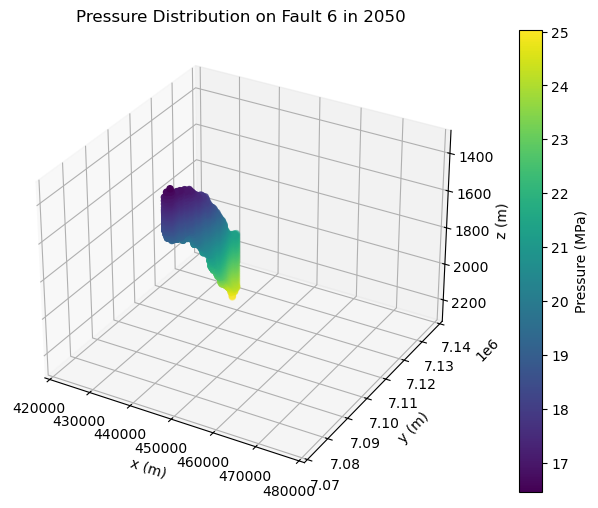

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
># parameters
fault_id = 0; year = 2050; year_list = [2030, 2040, 2050, 2060, 2550, 3050]
# load data
coor_fault = np.load('results/JD_Sula_2025_flow_coor&fault_reservoir.npy')
pres = np.load('data/results_trimmed/case1_PRES.npy')
fault_slip = np.load('results/fault_slip2/case1_fault_slip.npy')
# Filter data for the specific fault_id
mask = (coor_fault[:,:,:,3] == fault_id)
x_coor,y_coor,z_coor = coor_fault[:,:,:,0][mask], coor_fault[:,:,:,1][mask], coor_fault[:,:,:,2][mask]
pres_val = pres[:,:,:,year_list.index(year)][mask]/1000 # convert to MPa
fault_slip_val = fault_slip[:,:,:,year_list.index(year)][mask]

# Create a 3D plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
# Plot data
sc = ax.scatter(x_coor, y_coor, z_coor, c=pres_val, cmap='viridis')
plt.colorbar(sc, label='Pressure (MPa)')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.set_xlim(420000, 480000)
ax.set_ylim(7070000, 7140000)
ax.set_zlim(2300,1300)
ax.set_title(f'Pressure Distribution on Fault 6 in {year}')
# --- CHANGE PERSPECTIVE HERE ---
# ax.view_init(elev=90, azim=0) # Example: Top-down view
# ax.view_init(elev=20, azim=-65) # Example: A good starting isometric view
# Show plot
plt.show()

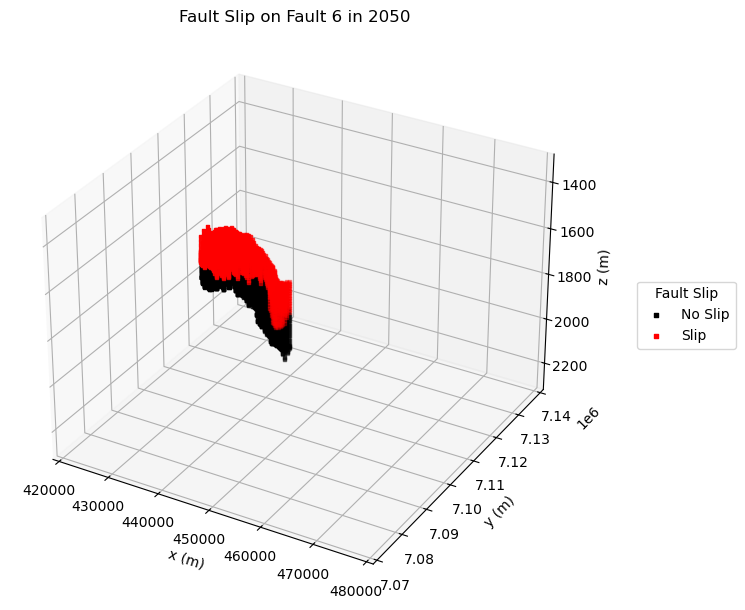

In [122]:
import matplotlib.pyplot as plt
import numpy as np
# parameters
fault_id = 0; year = 2050; year_list = [2030, 2040, 2050, 2060, 2550, 3050]
# load data
coor_fault = np.load('results/JD_Sula_2025_flow_coor&fault_reservoir.npy')
pres = np.load('data/results_trimmed/case1_PRES.npy')
fault_slip = np.load('results/fault_slip/case1_fault_slip.npy')
# Filter data for the specific fault_id
mask = (coor_fault[:,:,:,3] == fault_id)
x_coor,y_coor,z_coor = coor_fault[:,:,:,0][mask], coor_fault[:,:,:,1][mask], coor_fault[:,:,:,2][mask]
pres_val = pres[:,:,:,year_list.index(year)][mask]/1000 # convert to MPa
fault_slip_val = fault_slip[:,:,:,year_list.index(year)][mask]

# Create a 3D plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
# Masks for categories
mask0 = (fault_slip_val == 0)
mask1 = (fault_slip_val == 1)

# Plot each category separately
ax.scatter(x_coor[mask0], y_coor[mask0], z_coor[mask0],
           c='black', s=5, marker='s', label='No Slip')
ax.scatter(x_coor[mask1], y_coor[mask1], z_coor[mask1],
           c='red', s=5, marker='s', label='Slip')

# Add categorical legend on the right, outside the plot
ax.legend(
    title="Fault Slip",
    loc="center left",
    bbox_to_anchor=(1.1, 0.5),   # (x, y) anchor relative to the axes
    borderaxespad=0.
)

# Adjust layout so plot + legend fit
plt.tight_layout()

ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.set_xlim(420000, 480000)
ax.set_ylim(7070000, 7140000)
ax.set_zlim(2300,1300)
ax.set_title(f'Fault Slip on Fault 6 in {year}')
# --- CHANGE PERSPECTIVE HERE ---
# ax.view_init(elev=90, azim=0) # Example: Top-down view
# ax.view_init(elev=20, azim=-65) # Example: A good starting isometric view
# Show plot
plt.show()